<a href="https://colab.research.google.com/github/zar7364/DataScience/blob/main/Viz_Pokemon_Land_With_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
data=('/content/drive/MyDrive/Colab Notebooks/Plotly/Pokemon.csv')

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

In [97]:
import pandas as pd
df=pd.read_csv(data)
df=df.fillna(value={'Type 2':'Blank'})
df.Legendary=df.Legendary.apply(str)
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Blank,309,39,52,43,60,50,65,1,False


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [75]:
#1. Numerical Data

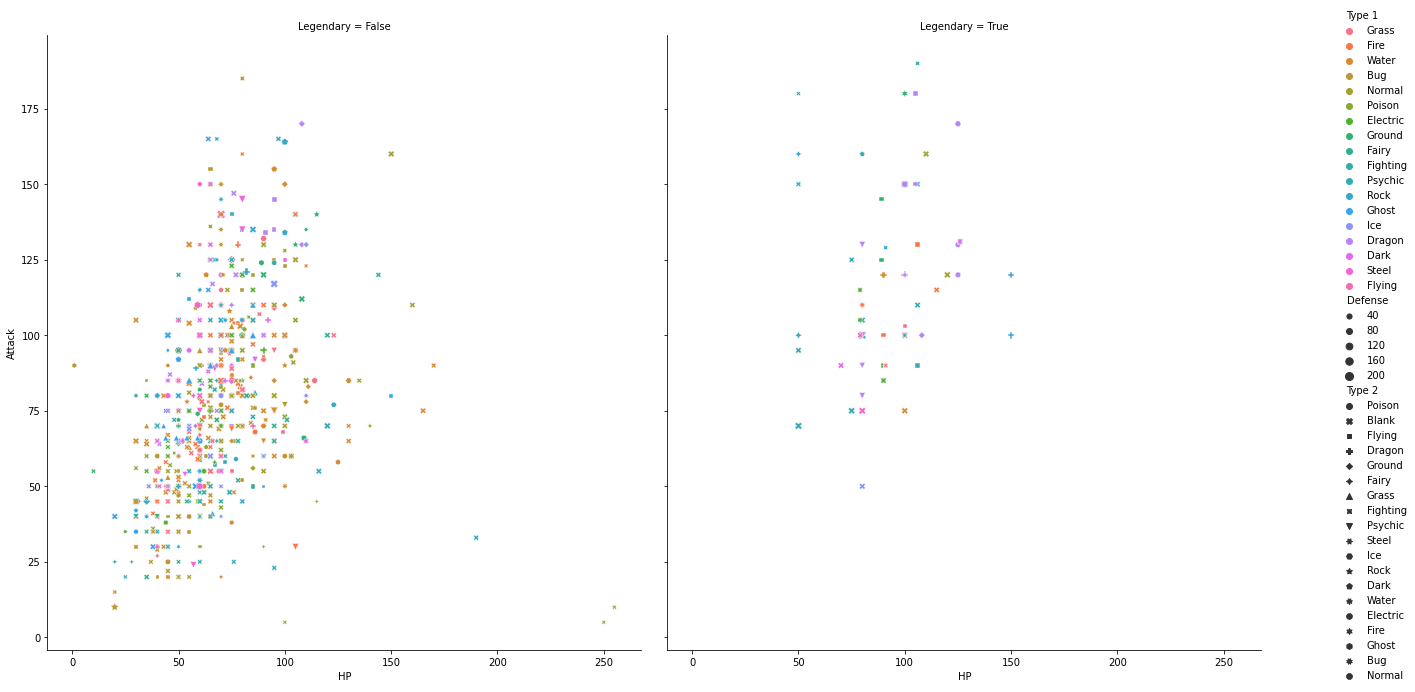

In [6]:
#Relation Plot to see the relation
_=sns.relplot(x=df.HP, y=df.Attack,hue=df['Type 1'],col=df.Legendary,size=df.Defense, data=df, style=df['Type 2']).fig.set_size_inches(20,10)

#Combine with Matplotlib
#plt.title("Relation")
#plt.show()

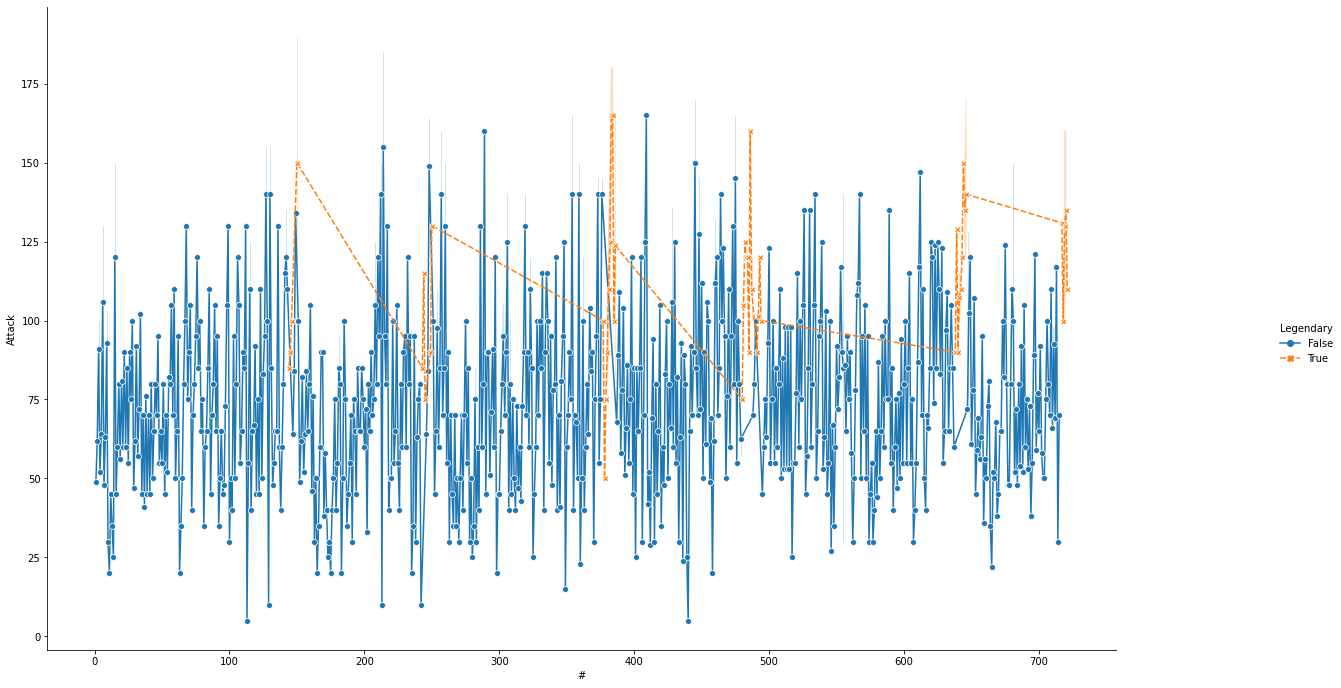

In [28]:
#relation plot
_=sns.relplot(x=df['#'], y=df.Attack, kind='line', style=df.Legendary, hue=df.Legendary, markers=True,dashes=True, data=df).fig.set_size_inches(20,10)

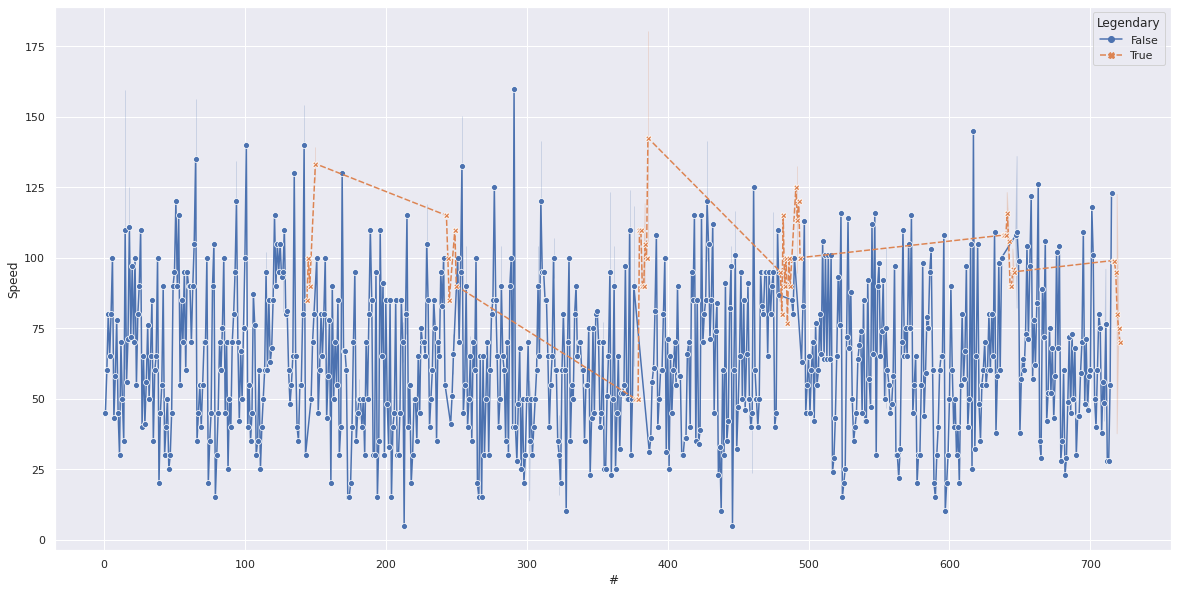

In [49]:
#Line Plot
_=sns.lineplot(x=df['#'], y=df.Speed, style=df.Legendary, hue=df.Legendary, markers=True,dashes=True,ci="sd", data=df)

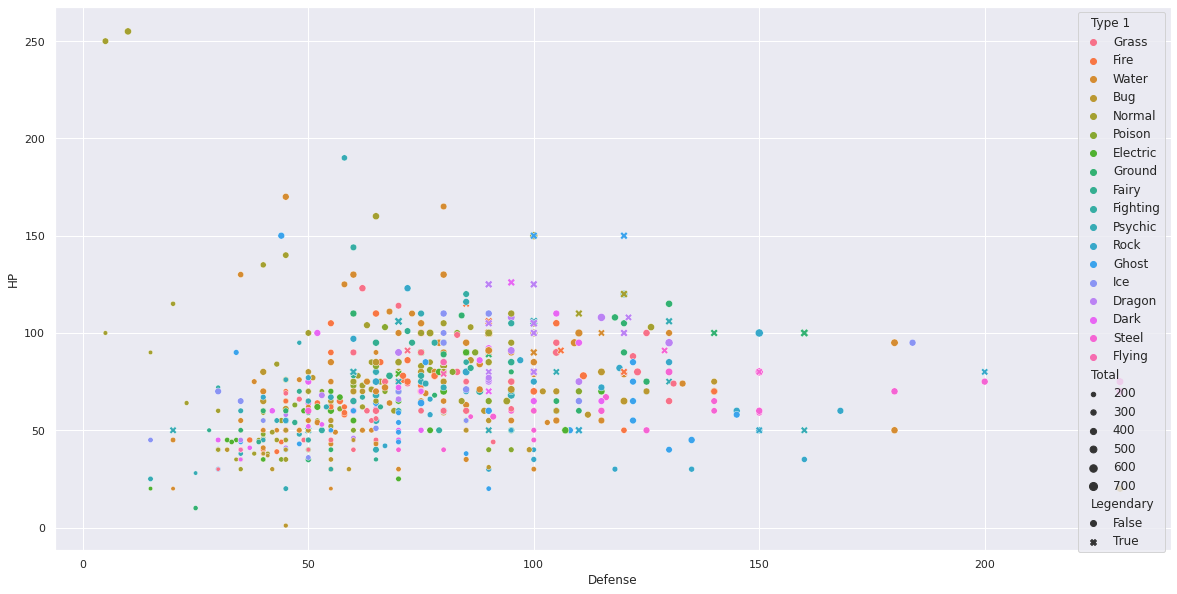

In [54]:
#ScatterPlot
_=sns.scatterplot(x=df.Defense,y=df.HP, style=df.Legendary,size=df.Total, hue=df['Type 1'], data=df)

In [55]:
#2. Categorical Data

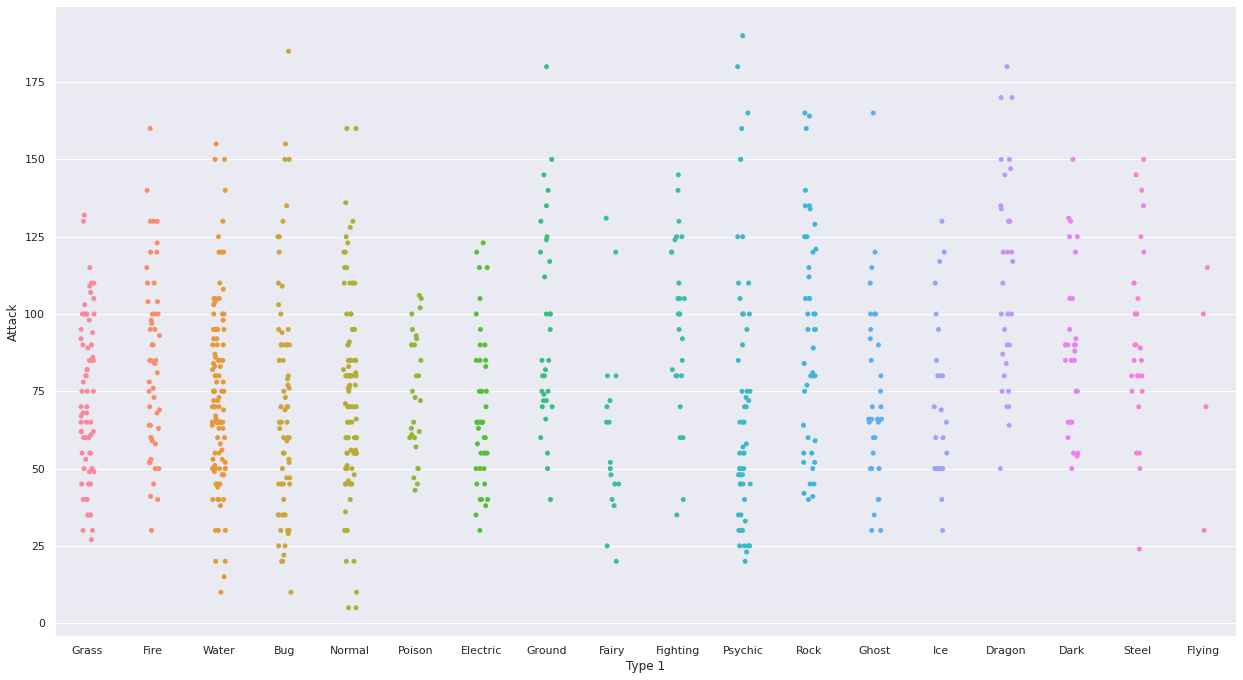

In [64]:
#1. Categorical Plot
sns.catplot(y=df.Attack, x=df['Type 1'], data=df).fig.set_size_inches(20,10)

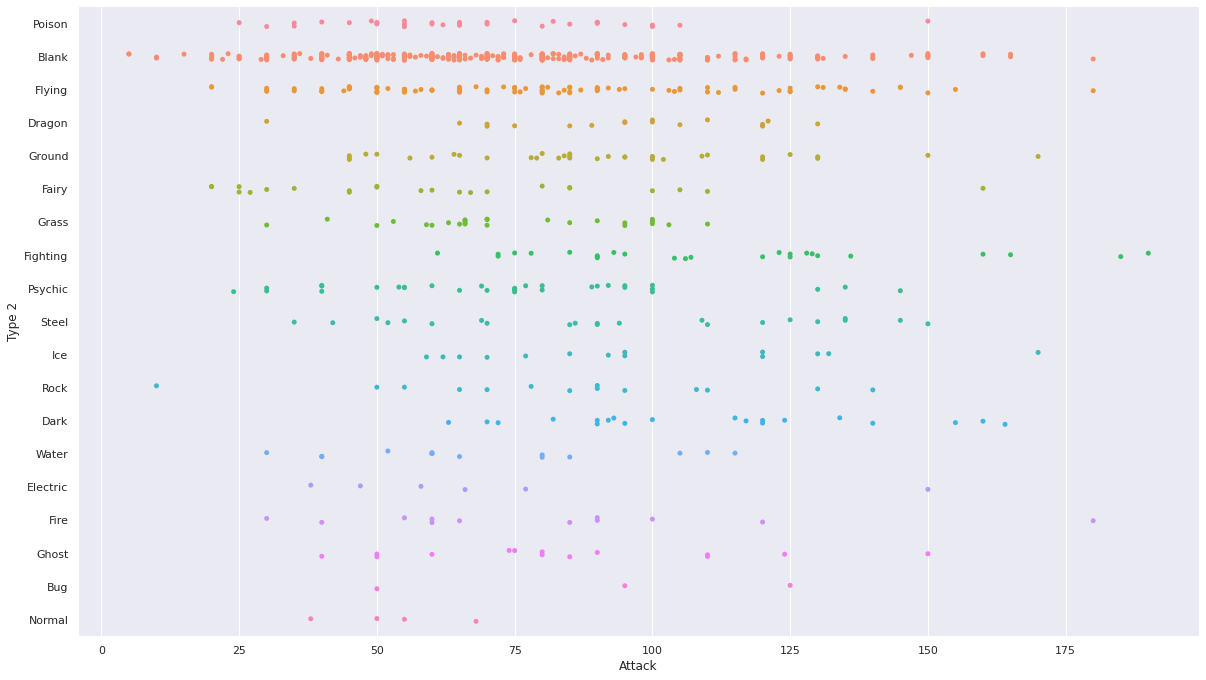

In [66]:
# (Descending)
sns.catplot(x=df.Attack, y=df['Type 2'], data=df).fig.set_size_inches(20,10)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 42.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 38.8% of the points cannot be placed; y

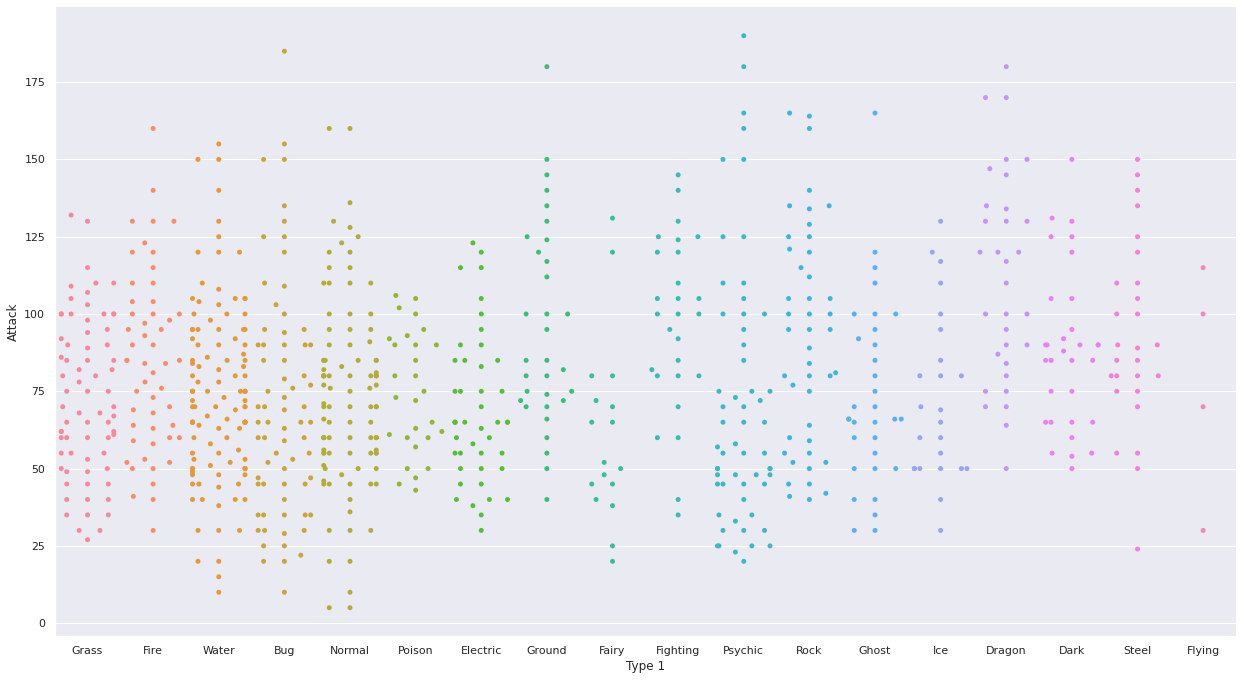

In [71]:
#Swarm Plot
#1. Categorical Plot
_=sns.catplot(y=df.Attack, x=df['Type 1'],kind="swarm", data=df).fig.set_size_inches(20,10)

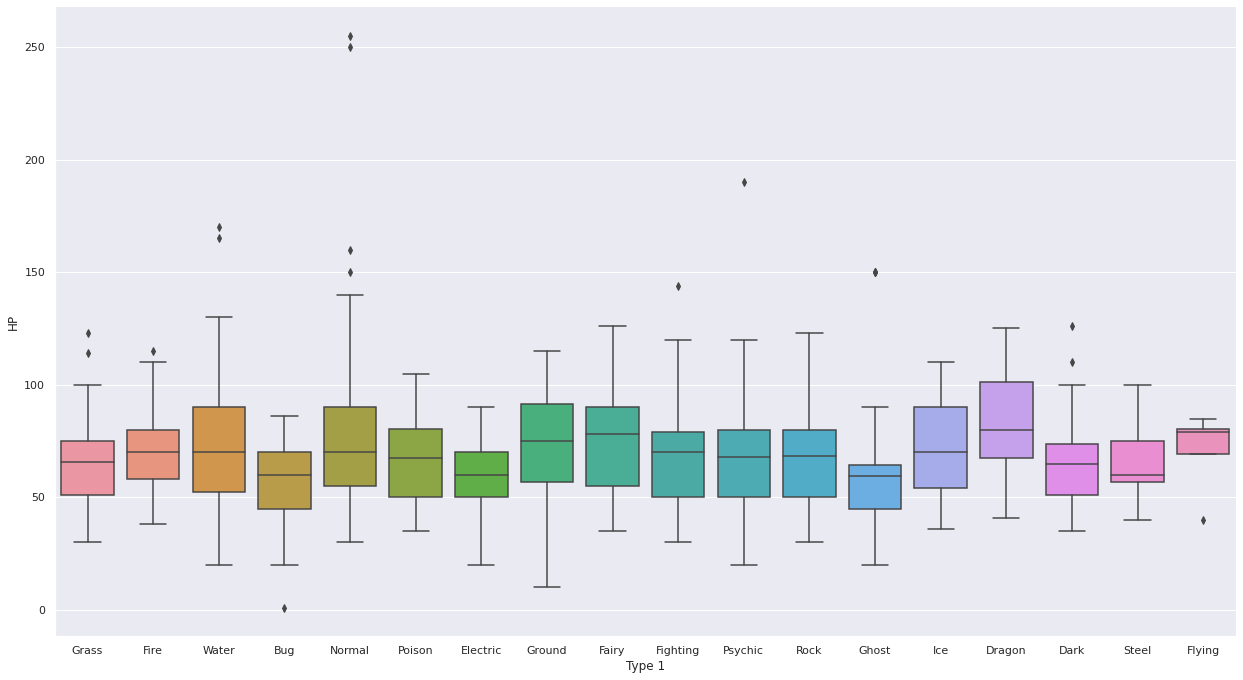

In [70]:
_=sns.catplot(y=df.HP, x=df['Type 1'], kind='box', data=df).fig.set_size_inches(20,10)

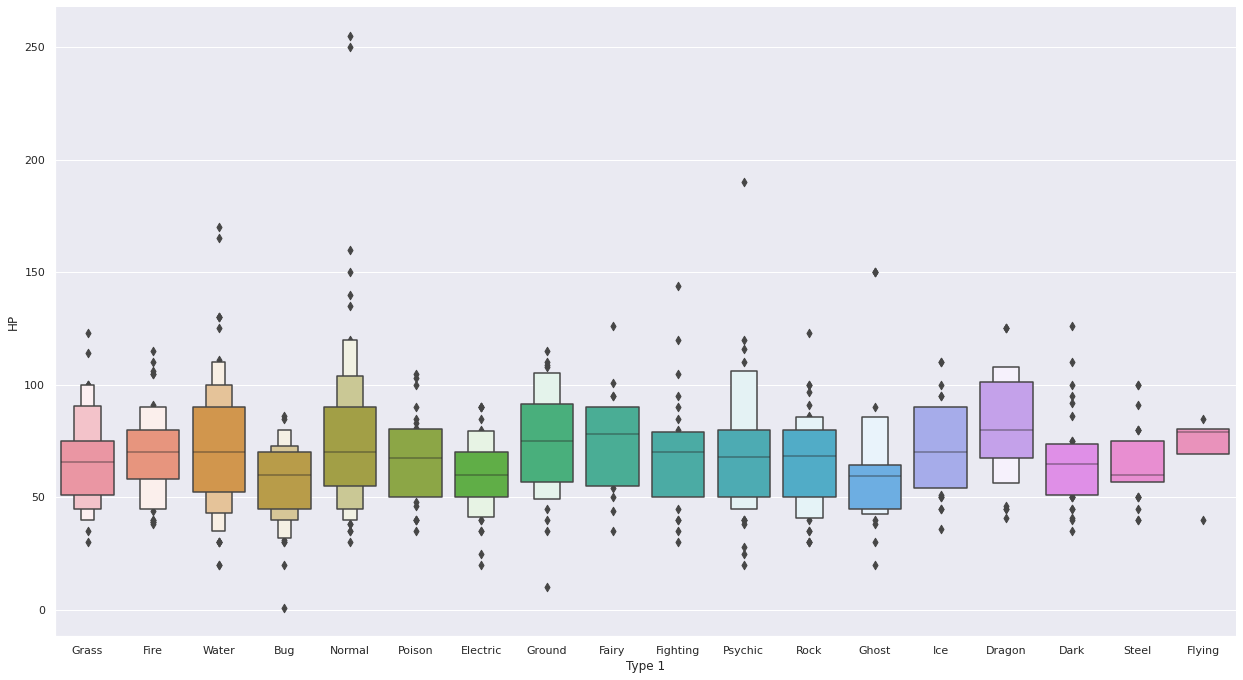

In [113]:
_=sns.catplot(y=df.HP, x=df['Type 1'], kind='boxen', data=df.sort_values('HP')).fig.set_size_inches(20,10)

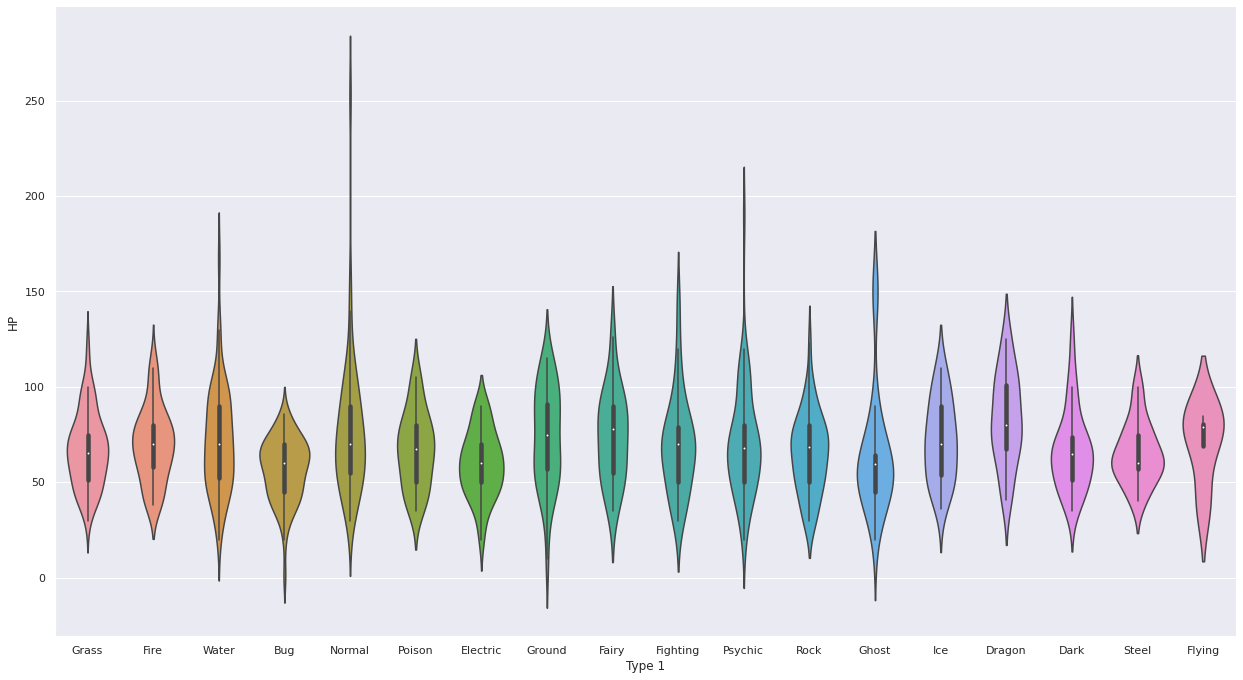

In [116]:
_=sns.catplot(y=df.HP, x=df['Type 1'], kind='violin',data=df.sort_values('HP')).fig.set_size_inches(20,10)

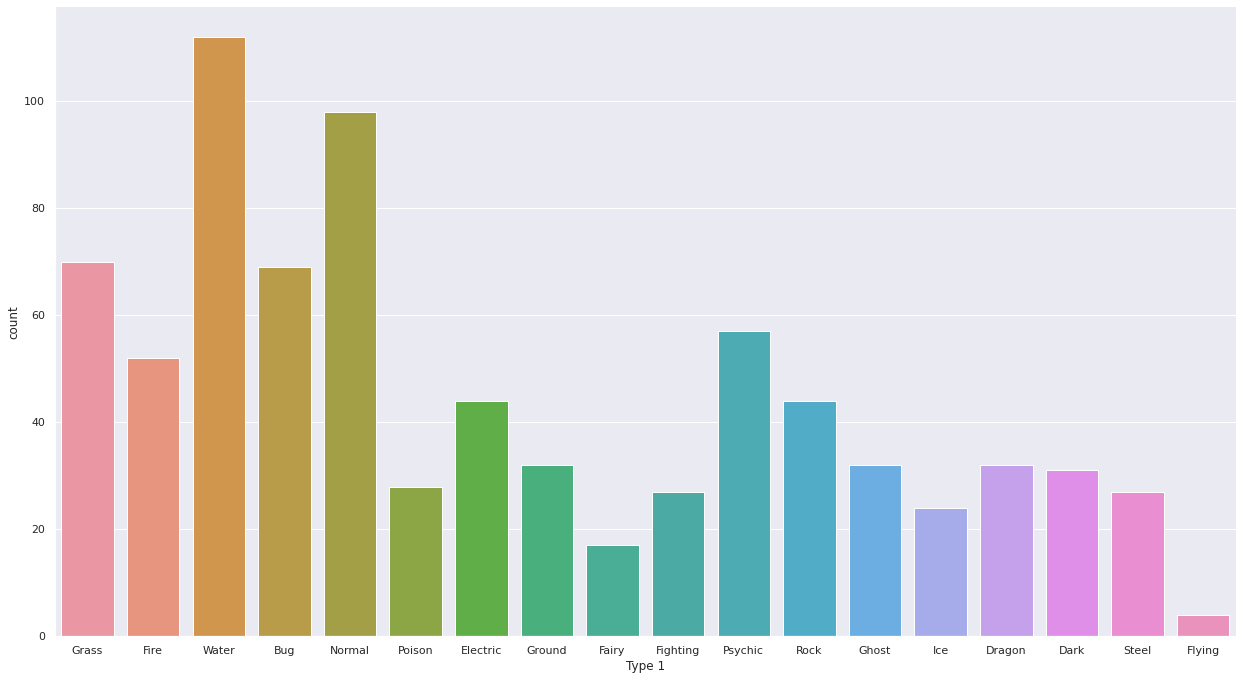

In [124]:
sns.catplot(x='Type 1', kind='count', data=df).fig.set_size_inches(20,10)

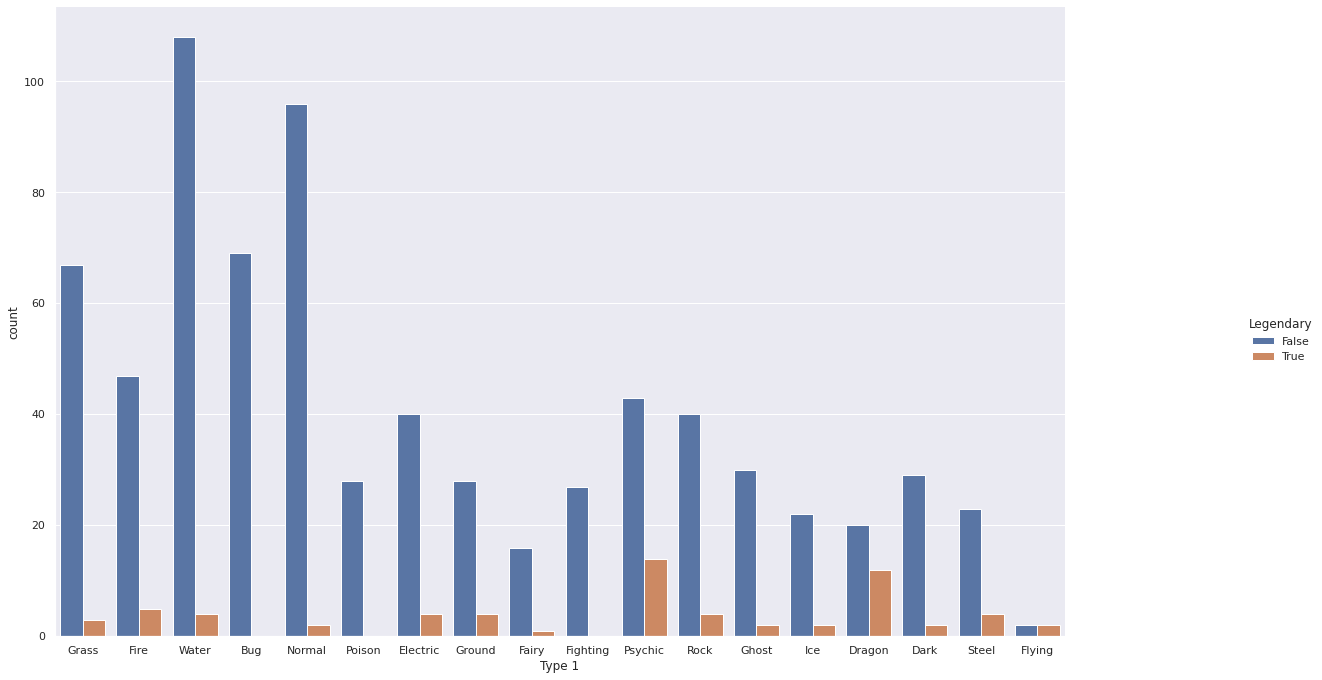

In [121]:
sns.catplot(x='Type 1', kind='count',hue='Legendary', data=df).fig.set_size_inches(20,10)

In [125]:
#3.Distribution Plot

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


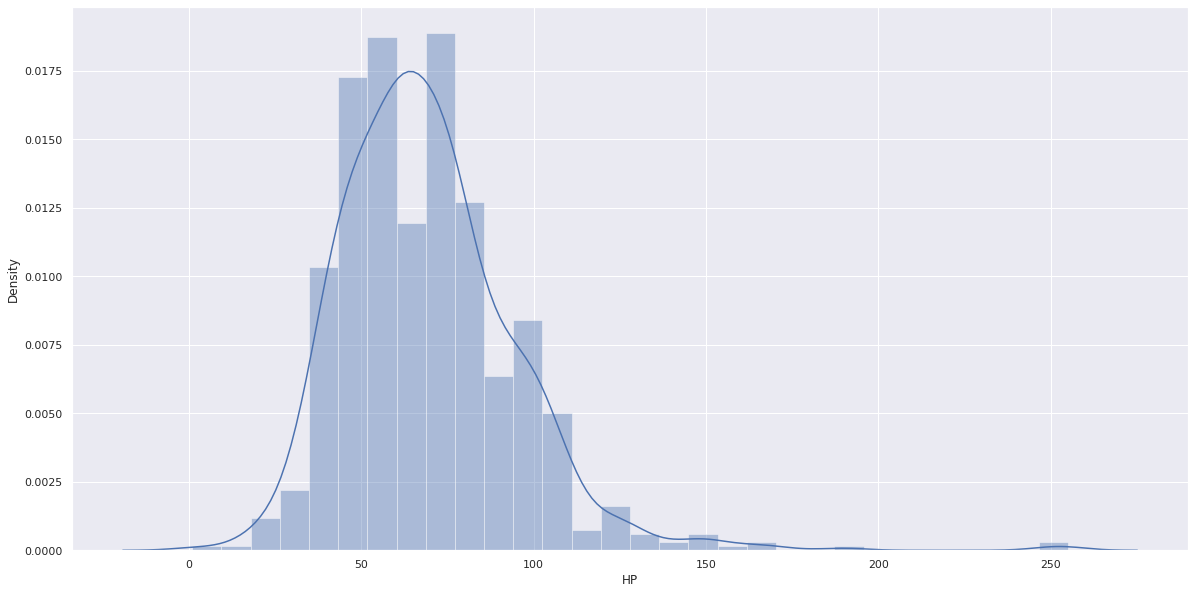

In [128]:
_=sns.distplot(df.HP,kde=True, hist=True, rug=False,bins=30)

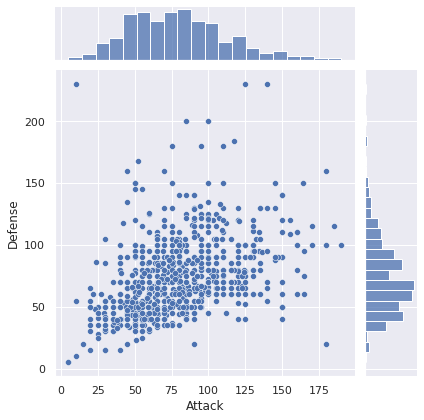

In [130]:
_=sns.jointplot(x = df.Attack, y=df.Defense, kind='resid')

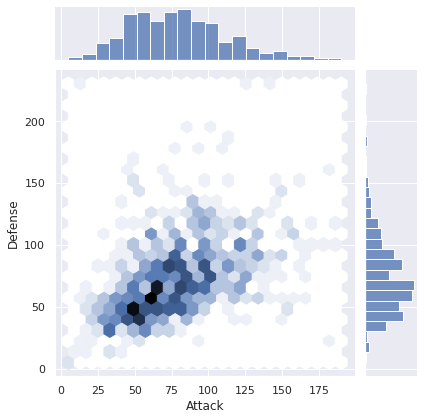

In [131]:
_=sns.jointplot(x = df.Attack, y=df.Defense, kind='hex')

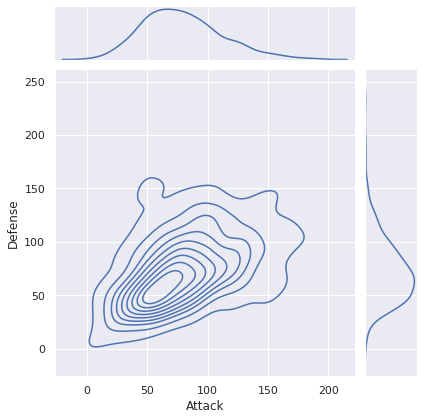

In [132]:
_=sns.jointplot(x = df.Attack, y=df.Defense, kind='kde')

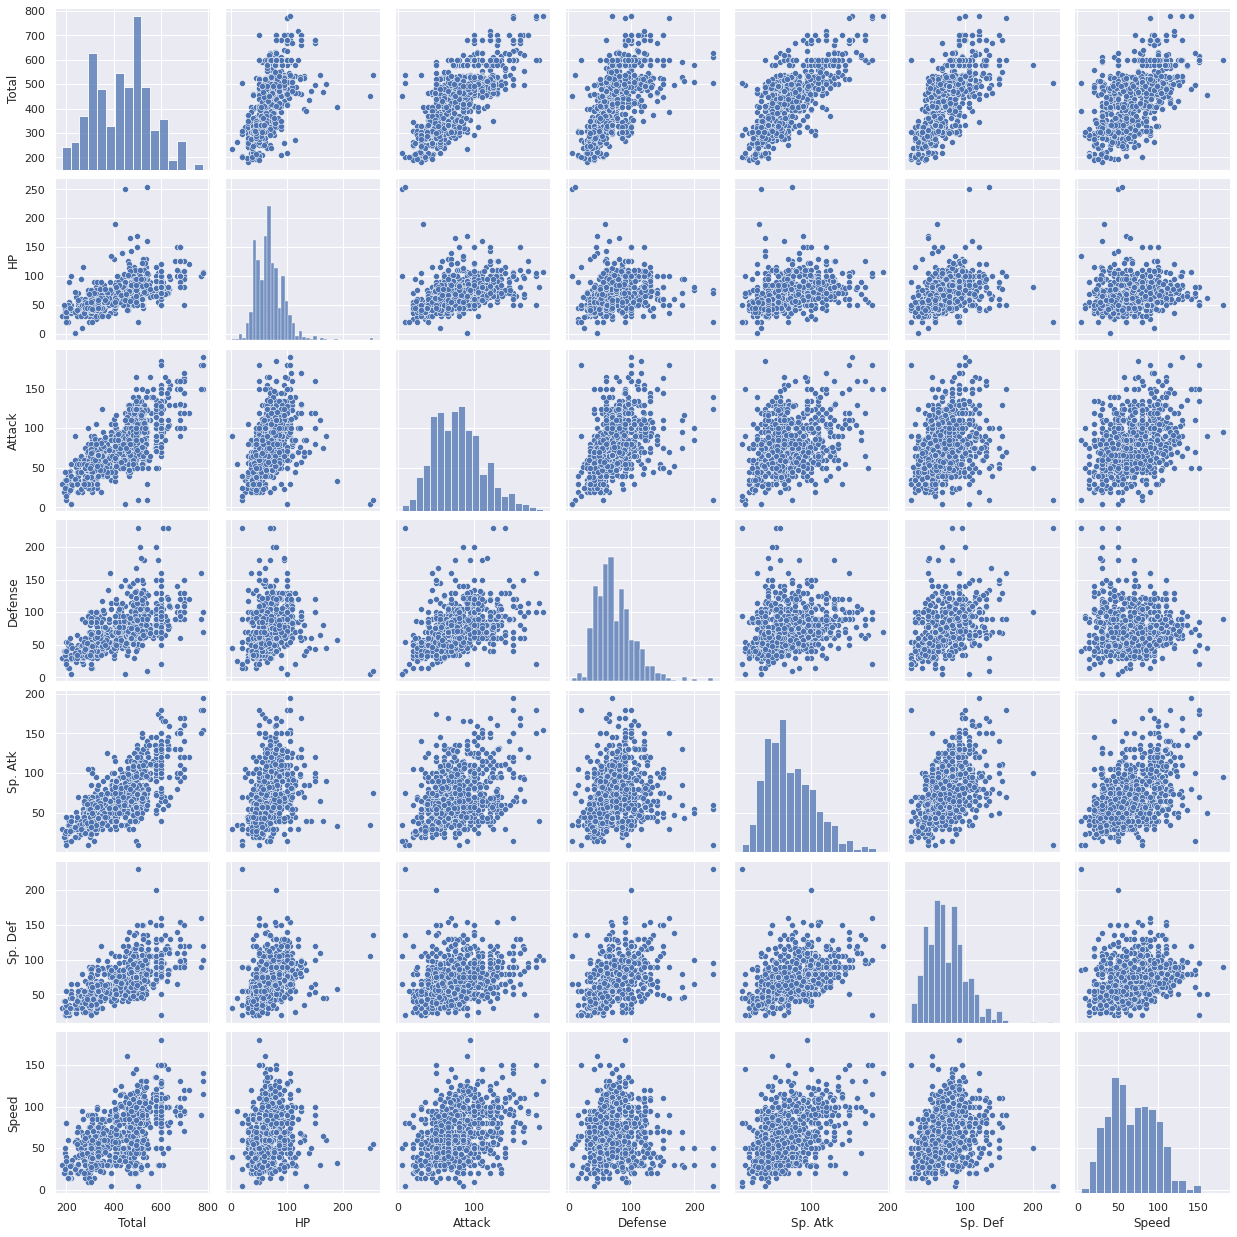

In [137]:
sns.pairplot(df.drop(['#','Generation'], axis=1))

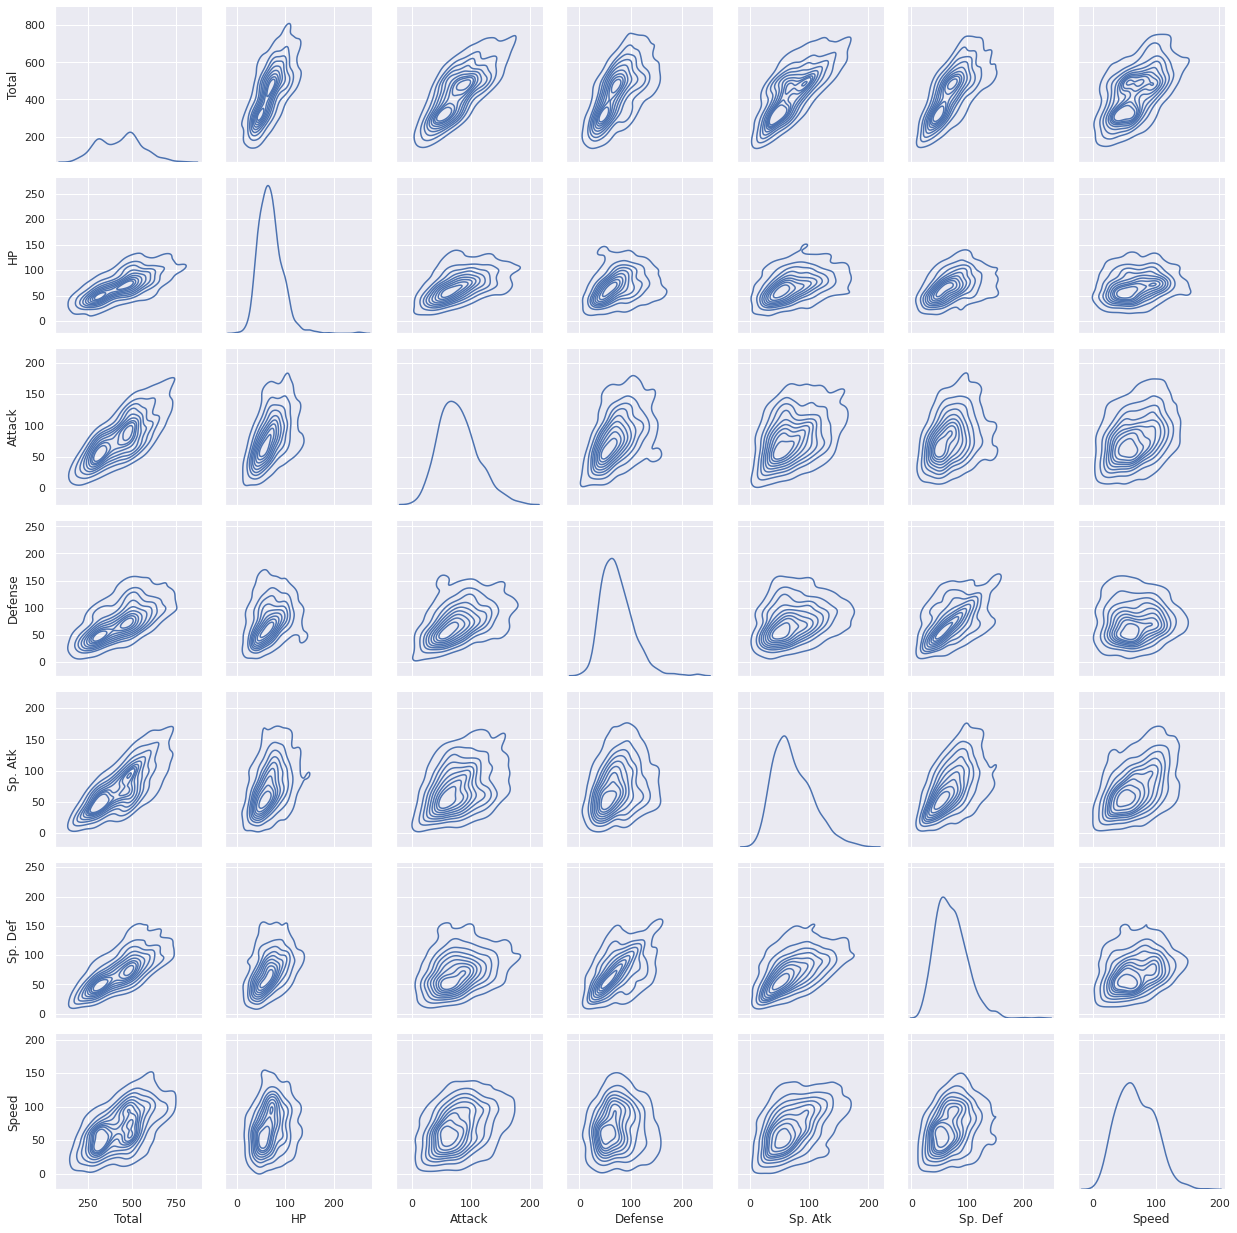

In [139]:
g=sns.PairGrid(df.drop(['#','Generation'], axis=1))
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels = 10)